# Advanced Machine Learning - Assignment 1

In [5]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from itertools import product
from random import randint

### Generate synthetic data

In [6]:
np.random.seed(1337)
N = 201 # number of samples
eps_mu = 0
eps_sigma = 0.2
w_0 = 0.5
w_1 = -1.5

X_Dat = np.linspace(-1.0,1.0, num=N)
eps = np.random.normal(eps_mu, eps_sigma, N)
T_Dat = X_Dat*w_0 + w_1 + eps

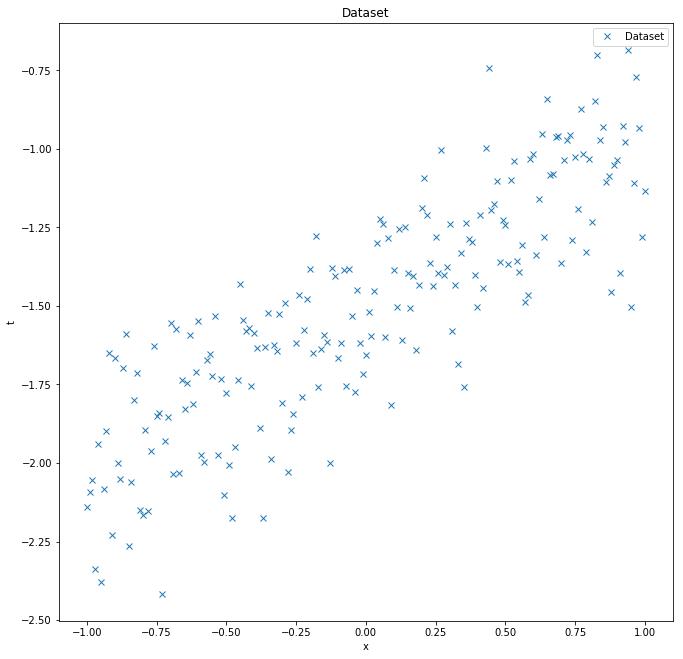

In [7]:
#Visualize dataset
plt.figure(figsize=(11, 11))
plt.plot(X_Dat, T_Dat, 'x',label = "Dataset")

plt.legend(loc="upper right")
plt.title("Dataset")
plt.ylabel('t')
plt.xlabel('x')
plt.show()

### Question 9

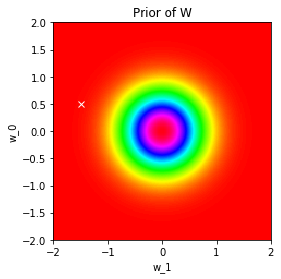

In [8]:
#1. Setting prior distribution over W = [w_0, w_1] and visualize it
# Assuming p(w) = N(prior_mu, prior_sigma^2I).

pixels = 200
prior_mu = [0, 0]
prior_sigma = 0.5
prior_cov_mat = [[prior_sigma**2, 0],[0, prior_sigma**2]] # spherical covariance matrix

max_axis = 2
w_0_range = np.linspace(-2.0, 2.0, num=pixels)
w_1_range = np.linspace(-2.0, 2.0, num=pixels)

X, Y = np.meshgrid(w_0_range, w_1_range)
N, M = len(X), len(Y)
Z = np.zeros((N, M))
for i,(x,y) in enumerate(product(w_0_range,w_1_range)):
    pos = np.hstack((x, y))
    Z[np.unravel_index(i, (N,M))] =  multivariate_normal(prior_mu, prior_cov_mat).pdf(pos)
im = plt.imshow(Z,cmap='hsv',extent=(-max_axis, max_axis, -max_axis, max_axis))
ax = plt.gca()
ax.grid(False)
plt.plot(w_1,w_0,'wx') 
plt.title("Prior of W")
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.show()

In [9]:
# Pick random datapoints from dataset
def getDataPoints(nr):
    ns = np.random.randint(low = 0, high = 200, size = nr)
    x_sample = []
    t_sample = []
    for n in ns:
        x_sample.append(X_Dat[n])
        t_sample.append(T_Dat[n])
    return np.array(x_sample), np.array(t_sample)

In [10]:
# 2. Picking a single data point (x_n,t_n) and visualising the posterior distribution over W.
def computePosterior(x_n, t_n, posterior=None):
    likelihood_sigma = eps_sigma
    
    #(x,y) represents (w_0, w_1) "coordinates"(random variables) in the image 
    for i,(x,y) in enumerate(product(w_0_range,w_1_range)):
        pos = np.hstack((x, y))
        likelihood_mu = -x*x_n + y #w_0*x_n + w_1

        #posterior prop to likelihood times prior
        if posterior is None:
            Z[np.unravel_index(i, (N,M))] =  norm(likelihood_mu, likelihood_sigma).pdf(t_n)*multivariate_normal(prior_mu, prior_cov_mat).pdf(pos)
        else:
            Z[np.unravel_index(i, (N,M))] =  norm(likelihood_mu, likelihood_sigma).pdf(t_n)*posterior[i]
            
            
    Z_vec = np.reshape(Z, pixels**2) 
    
    return Z_vec


In [11]:
#sample points from dataset
x_n, t_n = getDataPoints(7)

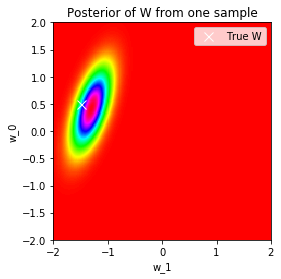

In [40]:
# Plot posterior for one data point
Z_vec = computePosterior(x_n[0],t_n[0]) #using one data point from sample

Z_matr = np.reshape(Z_vec,(pixels,pixels))
im = plt.imshow(Z_matr,cmap='hsv',extent=(-max_axis, max_axis, -max_axis, max_axis))
plt.plot(w_1,w_0,'wx', ms=9.0,label = "True W") 
plt.legend(loc="upper right")
ax = plt.gca()
ax.grid(False)
plt.title("Posterior of W from one sample")
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.show()

In [13]:
def plotFunction(Z_vec, nr_post_samples):
    W_post_samples =[]
    
    #Sampling with posterior distribution
    Z_rand_vals = np.random.choice(Z_vec,nr_post_samples,p=Z_vec/Z_vec.sum()) 
    
    #Finding corresponding indices
    indices = []
    for z_value in Z_rand_vals:
        indices.append(np.where(Z_vec == z_value))
    indices = np.asarray(indices)
    
    for i,(x,y) in enumerate(product(w_0_range,w_1_range)):
        for j, index in enumerate(indices):
            if i == index :
                    W_post_samples.append((x,y))

    #Plot the posterior samples
    x_range = np.linspace(-1.0, 1.0, num=pixels)
    fig = plt.figure()
    plt.title("t(x) from posterior samples of W")
    plt.plot(x_range,w_0*x_range + w_1,'-',label = "True Function", linewidth=6)
    plt.legend(loc="upper right")
    ax = plt.gca()
    ax.grid(False)
    for (w0,w1) in W_post_samples:
        plt.plot(x_range,-w0*x_range + w1)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()

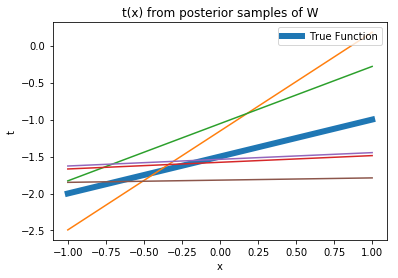

In [21]:
#3. Draw 5 samples from the posterior and plot the resulting functions.
plotFunction(Z_vec, 5)

posterior for data sample nr:  0  done
posterior for data sample nr:  1  done
posterior for data sample nr:  2  done


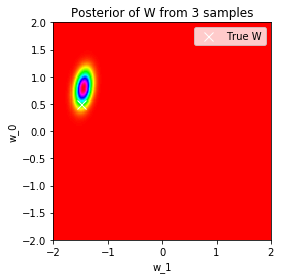

In [41]:
# 4. Repeat 2 − 3 by adding additional data points up to 7.
Z_vec2 = Z_vec #copying posterior vector

#Computing posterior iteratively with more and more data
for n in range(x_n.size-4):    
    Z_vec2 = computePosterior(x_n[n],t_n[n], Z_vec2) #using one data point
    print('posterior for data sample nr: ',n, ' done')

Z_matr2 = np.reshape(Z_vec2,(pixels,pixels))
im = plt.imshow(Z_matr2,cmap='hsv',extent=(-max_axis, max_axis, -max_axis, max_axis))
plt.plot(w_1,w_0,'wx', ms=9.0,label = "True W") 
plt.legend(loc="upper right")
ax = plt.gca()
ax.grid(False)
plt.title("Posterior of W from 3 samples")
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.show()

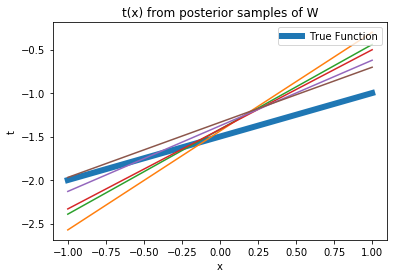

In [42]:
plotFunction(Z_vec2, 5)